(content:fit-no-error)=
# Ajustement avec des données sans erreurs

S'il s'agit de réduire l'écart entre $N$ points de données $\left\{y_i\right\}$ obtenus pour des valeurs $\left\{x_i\right\}$ et le modèle $f$ évalué au valeurs $\left\{x_i\right\}$, une quantité possible [^Excel] est:
\begin{equation}
    R^2 =  1- \frac{\sum _{i=1}^N\left(f(x_i; \alpha,\beta,...) - y_i\right)^2}{\sum _{i=1}^N\left(\bar{y}-y_i\right)^2},
\end{equation}
où $\bar{y}$ est la moyenne des mesures $\left\{y_i\right\}$.
Cette quantité $R^2$ est appelée **coefficient de détermination** et est sans unité.
Le numérateur correspond à la variance total des données par rapport au modèle et le dénominateur à celle des données par rapport à leur moyenne: pour un jeu de données fixé, le dénominateur est constant.
Puisque les valeurs de $x_i$ et $y_i$ sont fixées, la fonction $R^2$ dépend effectivement uniquement des paramètres $\alpha$, $\beta$... de la fonction $f$.

L'objectif est alors de trouver les valeurs de $\alpha$, $\beta$... qui minimisent la quantité $R^2$ et donc réduire l'écart quadratique entre le modèle et les données.
Pour cela, on peut utiliser la librairie ```scipy.optimize``` qui contient des fonctions permettant de faire ce type de minimisation.
Notamment, ```scipy.optimize.curve_fit``` permet de faire des ajustements pour des modèles $f$ quelconques alors que ```scipy.optimize.linregress``` permet de faire des ajustements pour des modèles de la forme $f(x) = a\times x+b$.
La valeur de $R^2$ obtenue pour les valeurs de paramètres qui la minimisent permet d'avoir un ordre de grandeur de la qualité de l'ajustement: l'ajustement d'un modèle présentant un $R^2$ minimal loin de 1 est moins bon que celui pour lequel $R^2\approx 1$.

````{admonition} Exemple: Ajustement linéaire simple
On considère des données sous la forme du tableau ci-dessous:

```{table} Jeu de données linéaires
:name: tab-linear-data
| $x_i$|$y_i$|
|------|-----|
| 1.0  | 1.2 |
| 2.0  | 1.6 |
| 3.0  | 1.7 |
| 4.0  | 2.2 |
| 5.0  | 2.3 |
| 6.0  | 2.4 |
| 7.0  | 3.1 |
| 8.0  | 3.3 |
| 9.0  | 3.1 |
| 10.0 | 3.7 |
```

Il s'agit de paires de deux mesures $x_i$ et $y_i$ reliées par la relation: 
\begin{equation}
    y_i = a\times x_i + b.
\end{equation}

Le coefficient de détermination que l'on va minimiser vaut:
\begin{equation}
    R^2 =  1- \frac{\sum _{i=1}^N\left(a\times x_i+b - y_i\right)^2}{\sum _{i=1}^N\left(\bar{y}-y_i\right)^2}.
\end{equation}

Le graphique ci-dessus montre que le modèle  s'ajuste bien aux données; le coefficient de détermination $R^2$ obtenu vaut 0.96. 
````

Fonction minimisant R^2: y = 0.27*x+1.00
Valeur de R^2: 0.96


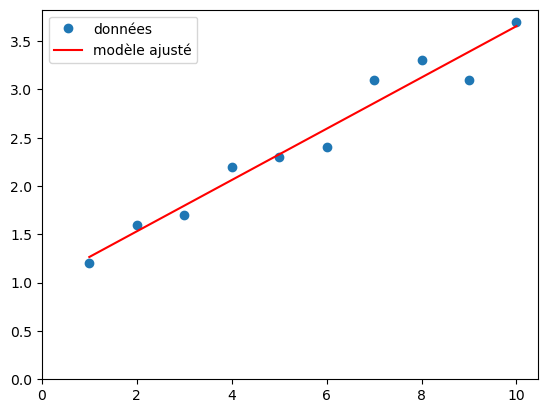

In [1]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt # importer maplotlib

fig, ax = plt.subplots() # creation d'un plot
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
y = np.array([1.2, 1.6, 1.7, 2.2, 2.3, 2.4, 3.1, 3.3, 3.1, 3.7])

pente, intercept, r2, _, _ = linregress(x, y) # regression lineaire
print("Fonction minimisant R^2: y = {:.2f}*x+{:.2f}"
       .format(pente, intercept))
print("Valeur de R^2: {:.2f}".format(r2**2))

plt.plot(x, y, 'o', label='données')
plt.plot(x, x*pente + intercept, 'r', label='modèle ajusté')
ax.set_xlim(left=0.) # choisir xmin = 0
ax.set_ylim(bottom=0.) # choisir ymin = 0
_ = plt.legend() # affichage legende



Le coefficient de détermination $R^2$ correspond à la corrélation entre les valeurs prédites par le modèle et les données obtenues: c'est donc un bon indicateur pour l'accord entre des données et un modèle, notamment dans le cas où l'on n'a pas d'erreurs sur les points de données.

[^Excel]: L'ajustement de données utilisé par le logiciel Excel utilise cette quantité.
